In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("ai_search_ecommerce_dataset_cleaned.csv")

df.head()


,date,user_id,session_id,device_type,traffic_source,search_type,product_category,region,zero_click,clicked,added_to_cart,order_placed,price,revenue,conversion_flag,zero_click_flag,revenue_final
0,2024-01-01 0:00,65487,97384,Mobile,Ai Search,Normal Search,Fashion,South,No,0,0,0,4587,0,0,0,0
1,2024-01-01 0:00,95843,54822,Desktop,Ai Search,Ai Search,Beauty,West,Yes,0,0,0,2105,0,0,1,0
2,2024-01-01 0:00,88025,6567,Mobile,Paid,Normal Search,Beauty,East,No,1,1,0,2284,0,0,0,0
3,2024-01-01 0:00,98041,37082,Desktop,Organic,Normal Search,Beauty,West,No,1,0,0,2598,0,0,0,0
4,2024-01-01 0:00,37981,76597,Desktop,Organic,Normal Search,Sports,North,No,0,0,0,9570,0,0,0,0


In [3]:
df.shape


(100000, 17)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   date              100000 non-null  object
 1   user_id           100000 non-null  int64 
 2   session_id        100000 non-null  int64 
 3   device_type       100000 non-null  object
 4   traffic_source    100000 non-null  object
 5   search_type       100000 non-null  object
 6   product_category  100000 non-null  object
 7   region            100000 non-null  object
 8   zero_click        100000 non-null  object
 9   clicked           100000 non-null  int64 
 10  added_to_cart     100000 non-null  int64 
 11  order_placed      100000 non-null  int64 
 12  price             100000 non-null  int64 
 13  revenue           100000 non-null  int64 
 14  conversion_flag   100000 non-null  int64 
 15  zero_click_flag   100000 non-null  int64 
 16  revenue_final     100000 non-null  int6

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

date                0
user_id             0
session_id          0
device_type         0
traffic_source      0
search_type         0
product_category    0
region              0
zero_click          0
clicked             0
added_to_cart       0
order_placed        0
price               0
revenue             0
conversion_flag     0
zero_click_flag     0
revenue_final       0
dtype: int64

In [7]:
df['date']=pd.to_datetime(df['date'])

In [9]:
numerical_cols = df.select_dtypes(['int64']).columns

In [10]:
for col in numerical_cols:
    negative_rows = df[df[col] < 0]
    
    if not negative_rows.empty:
        print(f"\n Negative values in column: {col}")
        print(negative_rows[[col]].head())
    else:
        print(f"{col} is clean")


user_id is clean
session_id is clean
clicked is clean
added_to_cart is clean
order_placed is clean
price is clean
revenue is clean
conversion_flag is clean
zero_click_flag is clean
revenue_final is clean


In [11]:
df = df.drop_duplicates(subset="session_id")

In [13]:
columns_to_fill_zero = [
    "revenue_final",
    "clicked",
    "added_to_cart",
    "order_placed"
]

for col in columns_to_fill_zero:
    missing_count = df[col].isnull().sum()
    
    if missing_count > 0:
        print(f"{missing_count} missing values found in {col}")
        
        # fill missing values with 0
        df[col] = df[col].fillna(0)
        
        print(f"Missing values filled with 0 in {col}")
    else:
        print(f"No missing values in {col}")


No missing values in revenue_final
No missing values in clicked
No missing values in added_to_cart
No missing values in order_placed


In [16]:
for col in columns_to_fill_zero:
    print(f"{col} - Missing values:", df[col].isnull().sum())


revenue_final - Missing values: 0
clicked - Missing values: 0
added_to_cart - Missing values: 0
order_placed - Missing values: 0


In [17]:
df[["order_placed", "conversion_flag"]].head()


,order_placed,conversion_flag
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [18]:
df[["zero_click", "zero_click_flag"]].head()


,zero_click,zero_click_flag
0,No,0
1,Yes,1
2,No,0
3,No,0
4,No,0


In [19]:
conversion_flag = []

for value in df["order_placed"]:
    if value == 1:
        conversion_flag.append(1)
    else:
        conversion_flag.append(0)

df["conversion_flag"] = conversion_flag


In [20]:
df[["order_placed", "conversion_flag"]].head()


,order_placed,conversion_flag
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [21]:
zero_click_flag = []

for value in df["zero_click"]:
    if value == "Yes":
        zero_click_flag.append(1)
    else:
        zero_click_flag.append(0)

df["zero_click_flag"] = zero_click_flag


In [22]:
df[["zero_click", "zero_click_flag"]].head()


,zero_click,zero_click_flag
0,No,0
1,Yes,1
2,No,0
3,No,0
4,No,0


In [23]:
df.head()

,date,user_id,session_id,device_type,traffic_source,search_type,product_category,region,zero_click,clicked,added_to_cart,order_placed,price,revenue,conversion_flag,zero_click_flag,revenue_final
0,2024-01-01,65487,97384,Mobile,Ai Search,Normal Search,Fashion,South,No,0,0,0,4587,0,0,0,0
1,2024-01-01,95843,54822,Desktop,Ai Search,Ai Search,Beauty,West,Yes,0,0,0,2105,0,0,1,0
2,2024-01-01,88025,6567,Mobile,Paid,Normal Search,Beauty,East,No,1,1,0,2284,0,0,0,0
3,2024-01-01,98041,37082,Desktop,Organic,Normal Search,Beauty,West,No,1,0,0,2598,0,0,0,0
4,2024-01-01,37981,76597,Desktop,Organic,Normal Search,Sports,North,No,0,0,0,9570,0,0,0,0


In [24]:
total_sessions = 0

for _ in df["session_id"]:
    total_sessions += 1

total_sessions


100000

In [25]:
clicked_count = 0
cart_count = 0
order_count = 0

for i in range(len(df)):
    if df.loc[i, "clicked"] == 1:
        clicked_count += 1
        
    if df.loc[i, "added_to_cart"] == 1:
        cart_count += 1
        
    if df.loc[i, "order_placed"] == 1:
        order_count += 1

clicked_count, cart_count, order_count


(45132, 18362, 10036)

In [26]:
funnel = {
    "Sessions": total_sessions,
    "Clicked": clicked_count,
    "Added to Cart": cart_count,
    "Orders": order_count
}

funnel


{'Sessions': 100000, 'Clicked': 45132, 'Added to Cart': 18362, 'Orders': 10036}

In [29]:

conversion_rate = (order_count / total_sessions) * 100
conversion_rate


10.036000000000001

In [33]:
for value in df["search_type"].unique():
    print(value)


Normal Search
Ai Search


In [34]:
ai_sessions = 0
ai_orders = 0

normal_sessions = 0
normal_orders = 0

for i in range(len(df)):
    if df.loc[i, "search_type"] == "Ai Search":
        ai_sessions += 1
        if df.loc[i, "order_placed"] == 1:
            ai_orders += 1
            
    else:
        normal_sessions += 1
        if df.loc[i, "order_placed"] == 1:
            normal_orders += 1

ai_sessions, ai_orders, normal_sessions, normal_orders


(40136, 2780, 59864, 7256)

In [35]:
ai_conversion_rate = (ai_orders / ai_sessions) * 100

In [36]:
normal_conversion_rate = (normal_orders / normal_sessions) * 100
ai_conversion_rate, normal_conversion_rate


(6.926450069762806, 12.12080716290258)

In [37]:
zero_click_sessions = 0
zero_click_revenue = 0

for i in range(len(df)):
    if df.loc[i, "zero_click_flag"] == 1:
        zero_click_sessions += 1
        zero_click_revenue += df.loc[i, "revenue"]

zero_click_sessions, zero_click_revenue


(18077, np.int64(0))

In [38]:
zero_click_percentage = (zero_click_sessions / total_sessions) * 100
zero_click_percentage


18.076999999999998

In [39]:
mobile_sessions = 0
mobile_orders = 0
desktop_sessions = 0
desktop_orders = 0

for i in range(len(df)):
    if df.loc[i, "device_type"] == "Mobile":
        mobile_sessions += 1
        if df.loc[i, "order_placed"] == 1:
            mobile_orders += 1
    else:
        desktop_sessions += 1
        if df.loc[i, "order_placed"] == 1:
            desktop_orders += 1

mobile_conv = (mobile_orders / mobile_sessions) * 100
desktop_conv = (desktop_orders / desktop_sessions) * 100

mobile_conv, desktop_conv


(10.0293617678875, 10.048172286766789)

In [40]:
category_stats = {}

for i in range(len(df)):
    cat = df.loc[i, "product_category"]
    
    if cat not in category_stats:
        category_stats[cat] = {"sessions": 0, "orders": 0}
        
    category_stats[cat]["sessions"] += 1
    
    if df.loc[i, "order_placed"] == 1:
        category_stats[cat]["orders"] += 1

category_stats


{'Fashion': {'sessions': 20016, 'orders': 2049},
 'Beauty': {'sessions': 20033, 'orders': 2036},
 'Sports': {'sessions': 19942, 'orders': 1950},
 'Electronics': {'sessions': 19971, 'orders': 2024},
 'Home': {'sessions': 20038, 'orders': 1977}}

In [43]:
for cat in category_stats:
    conv = (category_stats[cat]["orders"] / category_stats[cat]["sessions"]) * 100
    print(cat, "- Conversion Rate:", round(conv, 2), "%")


Fashion - Conversion Rate: 10.24 %
Beauty - Conversion Rate: 10.16 %
Sports - Conversion Rate: 9.78 %
Electronics - Conversion Rate: 10.13 %
Home - Conversion Rate: 9.87 %


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt


In [50]:
import os

output_path = "outputs/charts"
os.makedirs(output_path, exist_ok=True)


In [52]:
df.columns

Index(['date', 'user_id', 'session_id', 'device_type', 'traffic_source',
       'search_type', 'product_category', 'region', 'zero_click', 'clicked',
       'added_to_cart', 'order_placed', 'price', 'revenue', 'conversion_flag',
       'zero_click_flag', 'revenue_final'],
      dtype='object')

In [53]:
# Numerical columns (metrics)
numerical_cols = []

for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        numerical_cols.append(col)

numerical_cols


['user_id',
 'session_id',
 'clicked',
 'added_to_cart',
 'order_placed',
 'price',
 'revenue',
 'conversion_flag',
 'zero_click_flag',
 'revenue_final']

In [54]:
# Categorical columns
categorical_cols = []

for col in df.columns:
    if df[col].dtype == "object":
        categorical_cols.append(col)

categorical_cols


['device_type',
 'traffic_source',
 'search_type',
 'product_category',
 'region',
 'zero_click']

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\2519414596.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette="viridis")


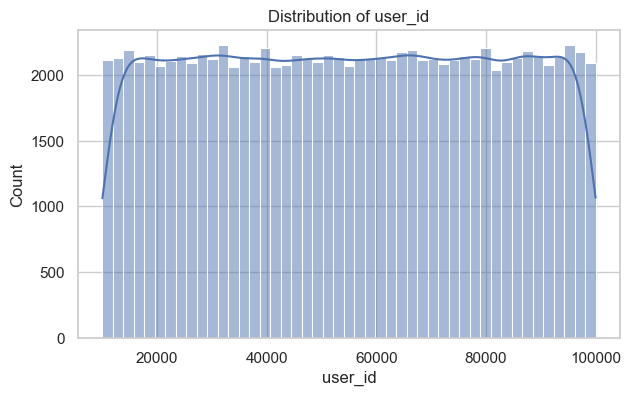

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\2519414596.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette="viridis")


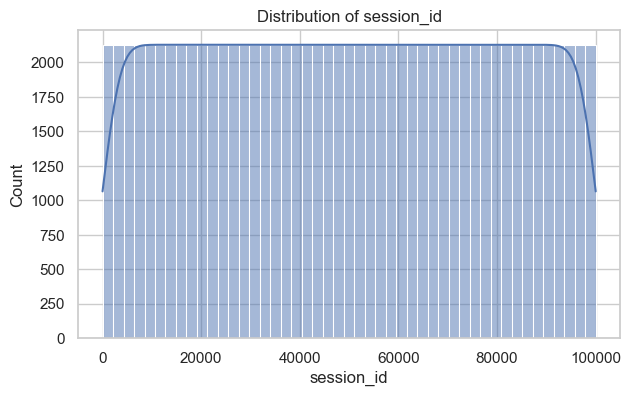

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\2519414596.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette="viridis")


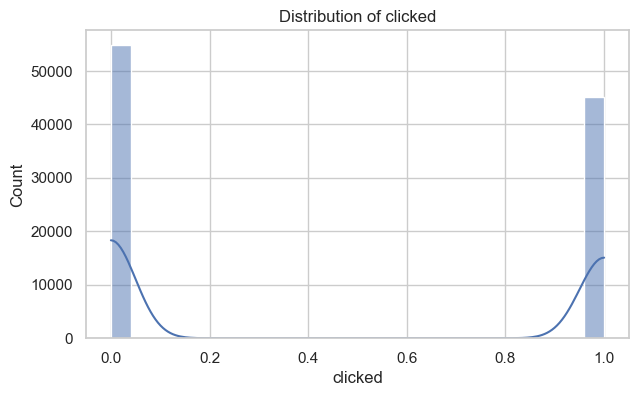

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\2519414596.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette="viridis")


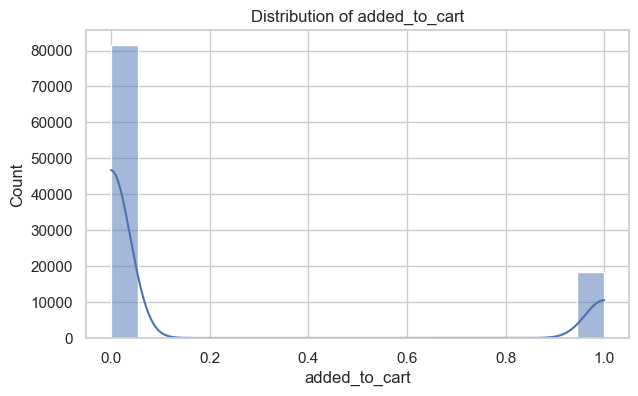

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\2519414596.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette="viridis")


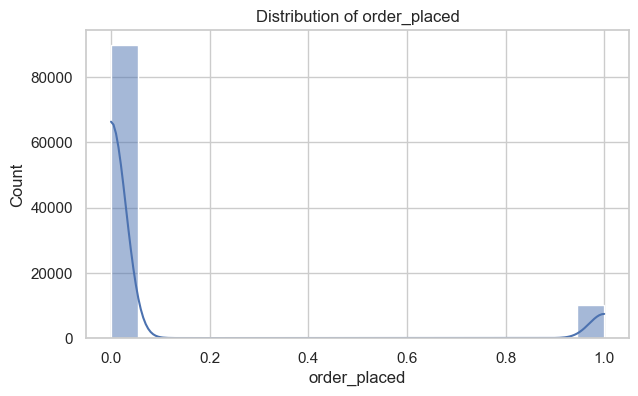

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\2519414596.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette="viridis")


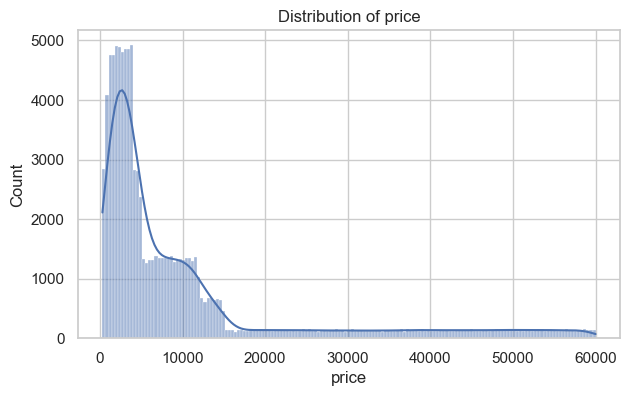

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\2519414596.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette="viridis")


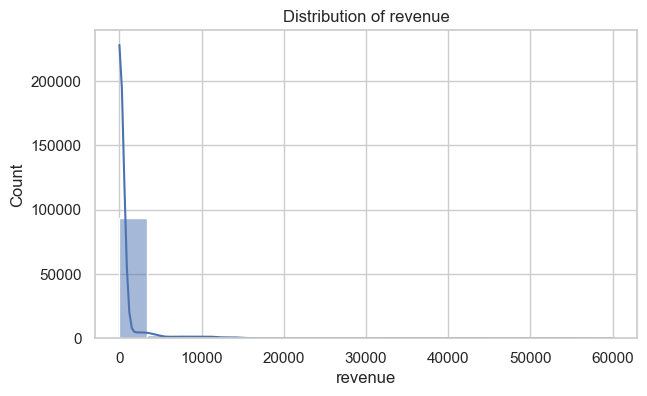

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\2519414596.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette="viridis")


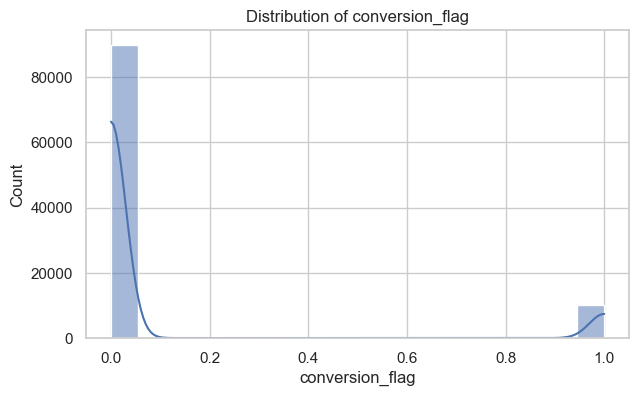

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\2519414596.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette="viridis")


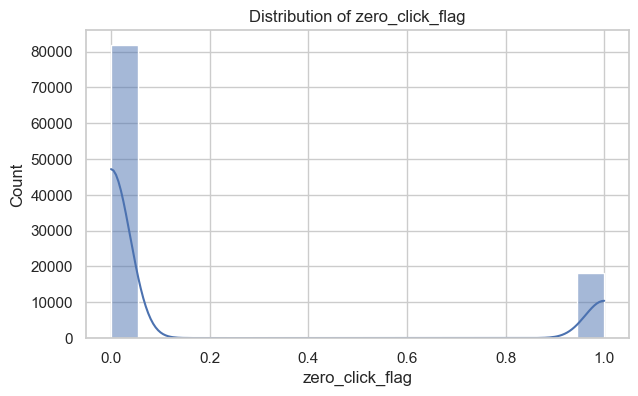

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\2519414596.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df[col], kde=True, palette="viridis")


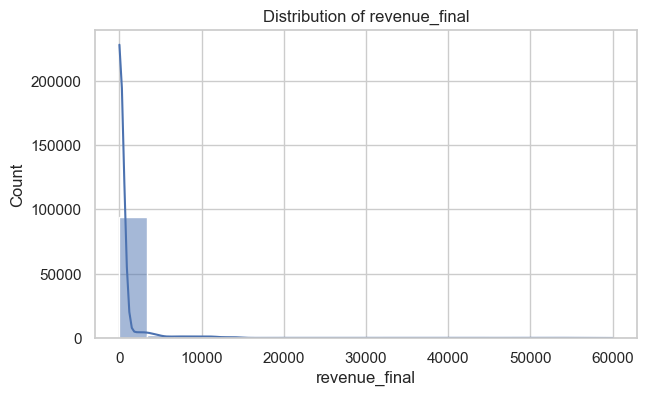

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for col in numerical_cols:
    
    plt.figure(figsize=(7,4))
    
    sns.histplot(df[col], kde=True, palette="viridis")
    
    plt.title(f"Distribution of {col}")
    
    plt.savefig(
        f"{output_path}/{col}_distribution.png",
        bbox_inches="tight"
    )
    
    plt.show()


C:\Users\offic\AppData\Local\Temp\ipykernel_20396\1695965662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


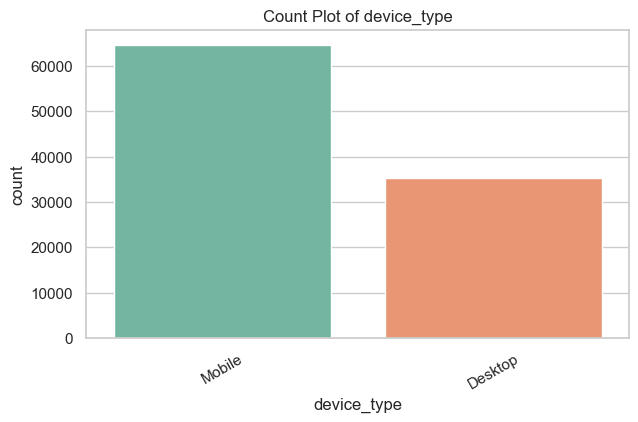

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\1695965662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


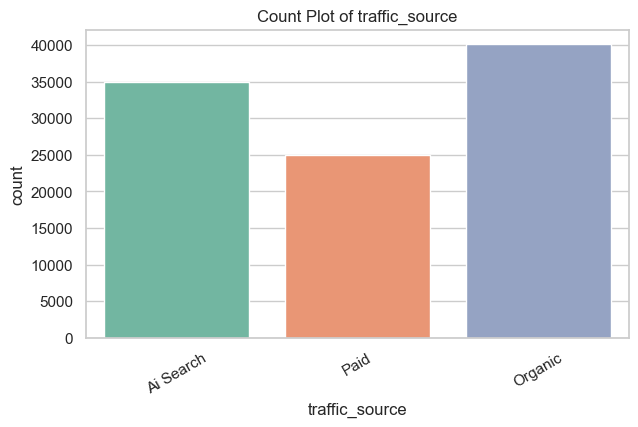

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\1695965662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


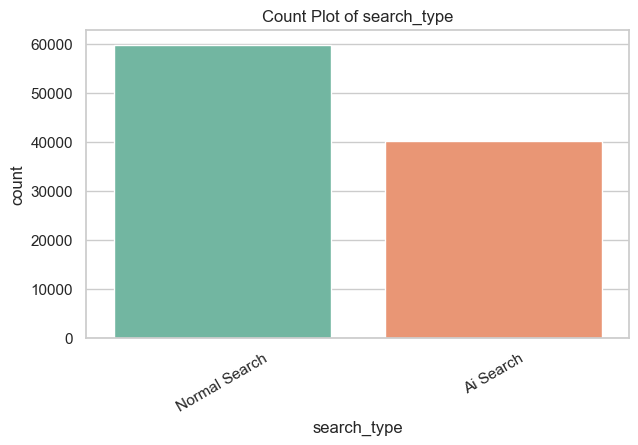

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\1695965662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


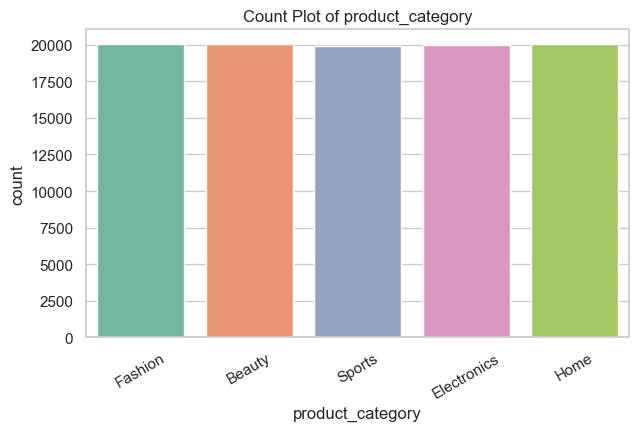

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\1695965662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


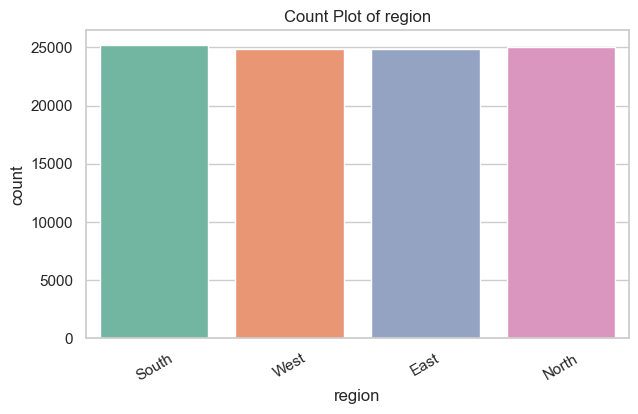

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\1695965662.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


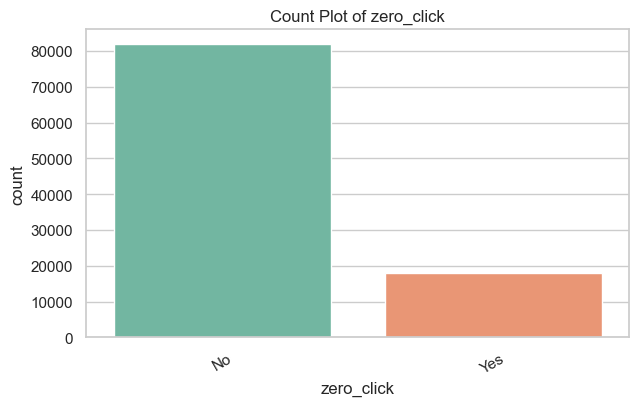

In [56]:
for col in categorical_cols:
    
    plt.figure(figsize=(7,4))
    
    sns.countplot(
        x=df[col],
        palette="Set2"
    )
    
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=30)
    
    plt.savefig(
        f"{output_path}/{col}_countplot.png",
        bbox_inches="tight"
    )
    
    plt.show()


C:\Users\offic\AppData\Local\Temp\ipykernel_20396\461309289.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


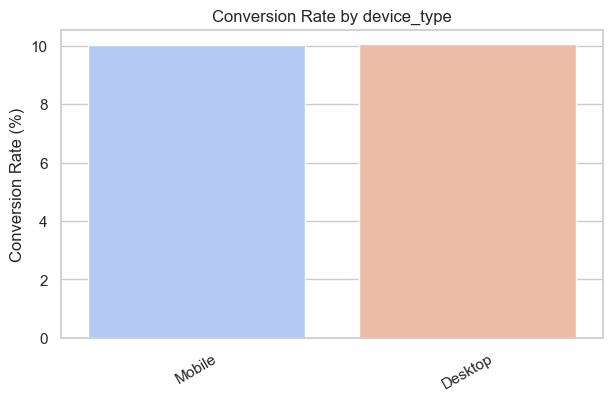

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\461309289.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


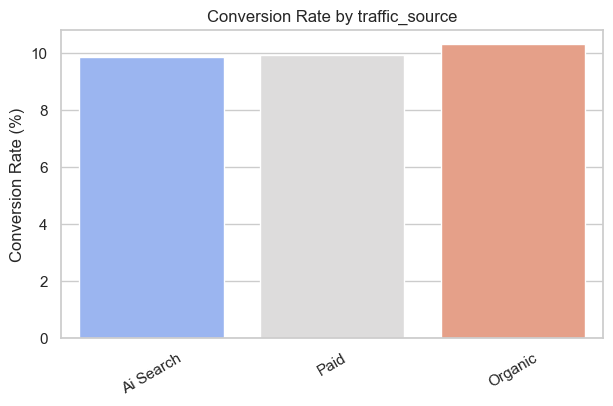

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\461309289.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


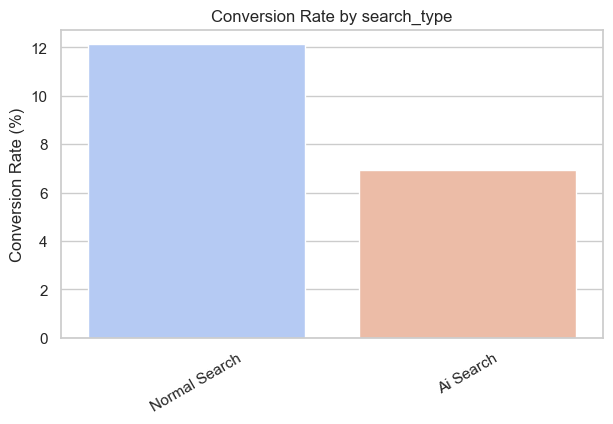

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\461309289.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


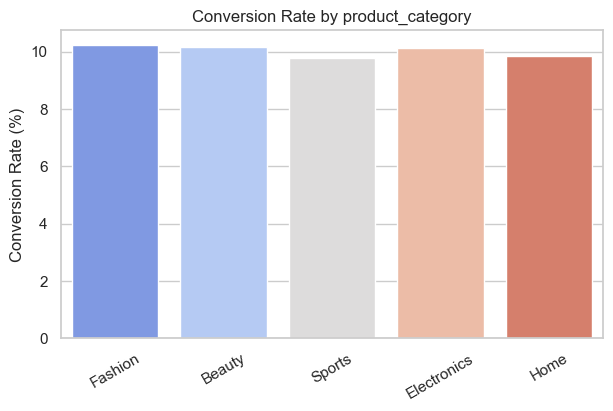

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\461309289.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


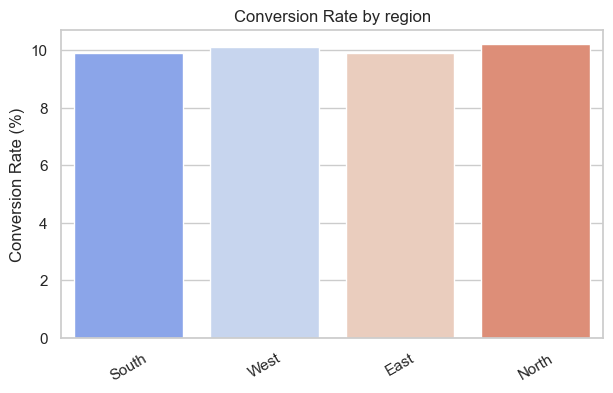

C:\Users\offic\AppData\Local\Temp\ipykernel_20396\461309289.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


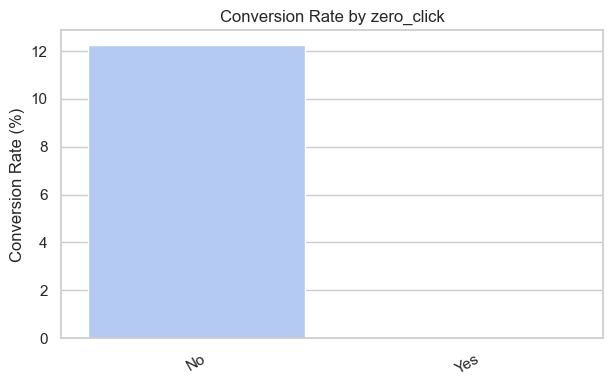

In [57]:
target_col = "conversion_flag"

for col in categorical_cols:
    
    conversion_rates = {}
    
    for value in df[col].unique():
        subset = df[df[col] == value]
        conversion_rates[value] = subset[target_col].mean() * 100
    
    plt.figure(figsize=(7,4))
    
    sns.barplot(
        x=list(conversion_rates.keys()),
        y=list(conversion_rates.values()),
        palette="coolwarm"
    )
    
    plt.title(f"Conversion Rate by {col}")
    plt.ylabel("Conversion Rate (%)")
    plt.xticks(rotation=30)
    
    plt.savefig(
        f"{output_path}/{col}_conversion_rate.png",
        bbox_inches="tight"
    )
    
    plt.show()


In [59]:
df.to_csv("cleaned_data.csv", index=False)
